In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import zipfile
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, silhouette_score, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.cluster import SilhouetteVisualizer
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier


In [8]:
!kaggle datasets download -d nelgiriyewithana/credit-card-fraud-detection-dataset-2023

with zipfile.ZipFile('credit-card-fraud-detection-dataset-2023.zip', 'r') as rip_ref:
    rip_ref.extractall('.')
!del -f credit-card-fraud-detection-dataset-2023.zip
shutil.move('creditcard_2023.csv',  '../../data/creditcard_2023.csv')


  0%|          | 0.00/143M [00:00<?, ?B/s]
  1%|          | 1.00M/143M [00:00<00:15, 9.47MB/s]
  2%|▏         | 3.00M/143M [00:00<00:13, 10.7MB/s]
  3%|▎         | 4.00M/143M [00:00<00:17, 8.44MB/s]
  3%|▎         | 5.00M/143M [00:00<00:34, 4.24MB/s]
  4%|▍         | 6.00M/143M [00:01<00:37, 3.80MB/s]
  5%|▍         | 7.00M/143M [00:01<00:43, 3.29MB/s]
  6%|▌         | 8.00M/143M [00:02<00:47, 3.01MB/s]
  6%|▋         | 9.00M/143M [00:02<00:53, 2.63MB/s]
  7%|▋         | 10.0M/143M [00:02<00:49, 2.81MB/s]
  8%|▊         | 11.0M/143M [00:03<00:51, 2.71MB/s]
  8%|▊         | 12.0M/143M [00:03<00:51, 2.69MB/s]
  9%|▉         | 13.0M/143M [00:04<00:52, 2.62MB/s]
 10%|▉         | 14.0M/143M [00:04<00:51, 2.60MB/s]
 10%|█         | 15.0M/143M [00:05<00:51, 2.59MB/s]
 11%|█         | 16.0M/143M [00:05<00:51, 2.58MB/s]
 12%|█▏        | 17.0M/143M [00:05<00:51, 2.55MB/s]
 13%|█▎        | 18.0M/143M [00:06<00:51, 2.55MB/s]
 13%|█▎        | 19.0M/143M [00:06<00:52, 2.46MB/s]
 14%|█▍        | 20.

'../../data/creditcard_2023.csv'

In [2]:
df = pd.read_csv('../../data/creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [80]:
# normalize amount
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])

# class wasn't dropped from the data when we first tried this
X = df.drop(columns=['id', 'Class'])
# reduce feature space temporarily
X = X[['V14', 'V4', 'V10', 'V12', 'V1']]
y = df['Class']

X, y = ADASYN().fit_resample(X, y)

Logistic Regression

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_preds = logit_model.predict(X_test)

print(f'Accuracy: {logit_model.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'F1 score: {f1_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_preds)}')

Accuracy: 0.954170550269947
Precision: 0.9744737611460312
F1 score: 0.9534118740726174
Recall: 0.9332411717355545
Confusion Matrix: 
[[55183  1397]
 [ 3815 53331]]


In [ ]:
dict(zip(logit_model.coef_.flatten(), X.columns))

In [84]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

y_preds = mlp.predict(X_test)

print(f'Accuracy: {mlp.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'F1 score: {f1_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_preds)}')
mlp.score(X_test, y_test)

c:\Users\Admin\anaconda3\envs\fraud\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9801540544818247
Precision: 0.9835268415581669
F1 score: 0.9801852420877046
Recall: 0.9768662723550204
Confusion Matrix: 
[[55645   935]
 [ 1322 55824]]


0.9801540544818247

Decision Tree

In [71]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_preds = decision_tree_model.predict(X_test)

print(f'Accuracy: {decision_tree_model.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'F1 score: {f1_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_preds)}')

Accuracy: 0.993809682922111
Precision: 0.9922381915858508
F1 score: 0.9938503467915233
Recall: 0.9954677492737899
Confusion Matrix: 
[[56135   445]
 [  259 56887]]


XGBoost

In [54]:

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_preds = xgb_clf.predict(X_test)

In [80]:
pipeline = Pipeline(steps=[('pca', pca), ('xgb', xgb_clf)])
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.98223801 0.98254577 0.98311732 0.98120922 0.98173681]


Accuracy: 0.9886041890157045
Precision: 0.9922381915858508
F1 score: 0.9938503467915233
Recall: 0.9954677492737899
Confusion Matrix: 
[[56135   445]
 [  259 56887]]
XGB Feature importances: [0.78677034 0.08849946 0.04171355 0.04615259 0.03686407]


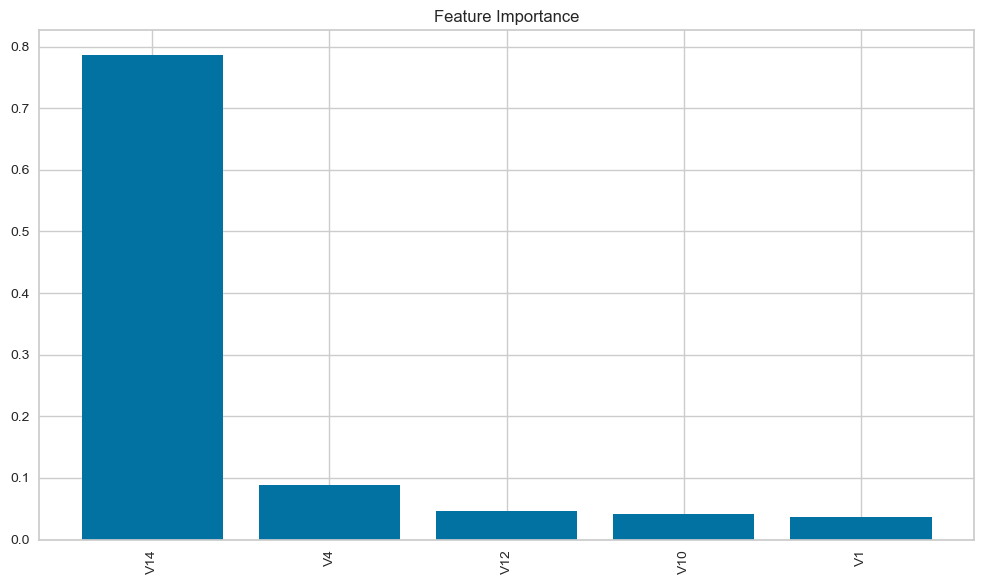

In [72]:
print(f'Accuracy: {xgb_clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'F1 score: {f1_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_preds)}')

importances = xgb_clf.feature_importances_

print(f"XGB Feature importances: {importances}")

sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()

plt.show()

In [60]:
weight = xgb_clf.get_booster().get_score(importance_type='weight')
print("Weight:", weight)

# Gain
gain = xgb_clf.get_booster().get_score(importance_type='gain')
print("Gain:", gain)

# Cover
cover = xgb_clf.get_booster().get_score(importance_type='cover')
print("Cover:", cover)


sorted_weight = sorted(weight.items(), key=lambda kv: kv[1], reverse=True)
sorted_gain = sorted(gain.items(), key=lambda kv: kv[1], reverse=True)
sorted_cover = sorted(cover.items(), key=lambda kv: kv[1], reverse=True)

Weight: {'V1': 145.0, 'V2': 118.0, 'V3': 161.0, 'V4': 220.0, 'V5': 121.0, 'V6': 118.0, 'V7': 163.0, 'V8': 110.0, 'V9': 103.0, 'V10': 143.0, 'V11': 156.0, 'V12': 186.0, 'V13': 118.0, 'V14': 227.0, 'V15': 143.0, 'V16': 146.0, 'V17': 146.0, 'V18': 105.0, 'V19': 133.0, 'V20': 128.0, 'V21': 111.0, 'V22': 108.0, 'V23': 82.0, 'V24': 130.0, 'V25': 143.0, 'V26': 171.0, 'V27': 137.0, 'V28': 113.0, 'Amount': 3.0}
Gain: {'V1': 128.46144104003906, 'V2': 66.21411895751953, 'V3': 114.0250015258789, 'V4': 388.8073425292969, 'V5': 48.415794372558594, 'V6': 47.56235885620117, 'V7': 65.07354736328125, 'V8': 127.8675765991211, 'V9': 44.61991500854492, 'V10': 159.4195098876953, 'V11': 78.5962905883789, 'V12': 146.43121337890625, 'V13': 57.81001663208008, 'V14': 3953.446044921875, 'V15': 37.30594253540039, 'V16': 49.35089111328125, 'V17': 72.12116241455078, 'V18': 69.96221923828125, 'V19': 49.0638542175293, 'V20': 42.26601791381836, 'V21': 54.006866455078125, 'V22': 45.480472564697266, 'V23': 70.53199768066

c:\Users\Admin\anaconda3\envs\fraud\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


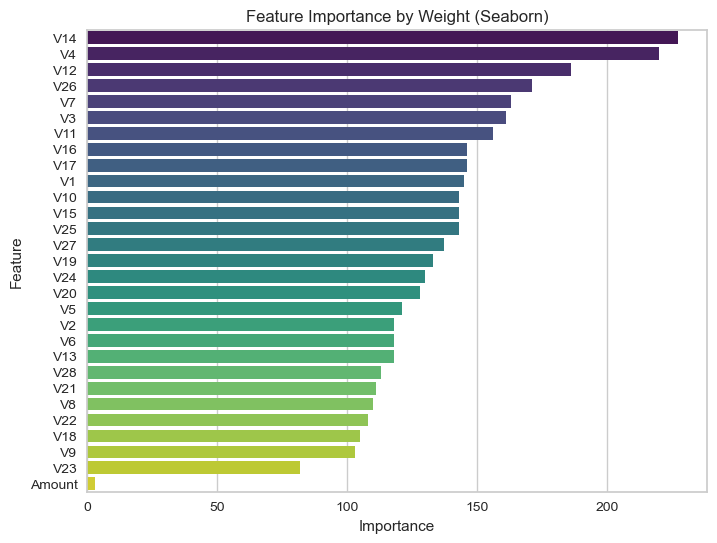

c:\Users\Admin\anaconda3\envs\fraud\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


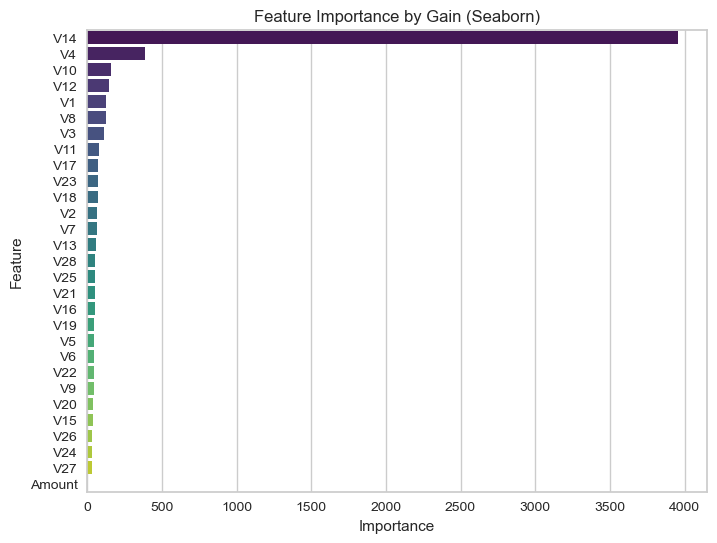

c:\Users\Admin\anaconda3\envs\fraud\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


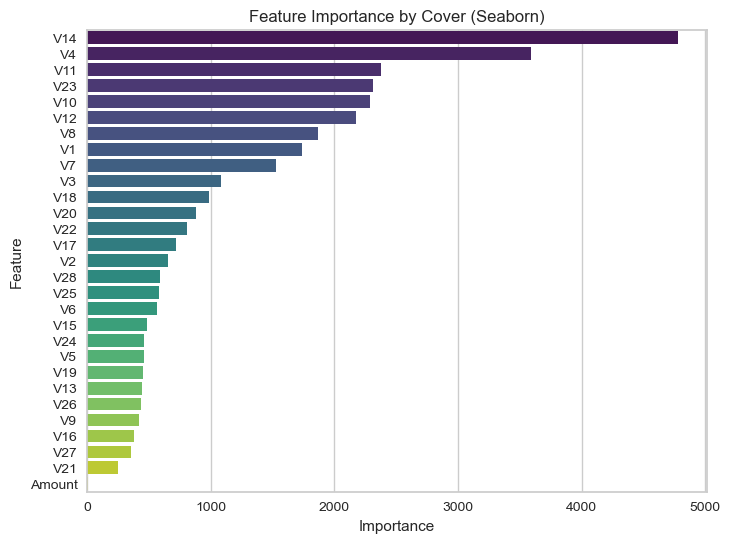

In [61]:
def plot_importance_seaborn(sorted_importance, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x=[x[1] for x in sorted_importance], y=[x[0] for x in sorted_importance], ax=ax, palette='viridis')
    ax.set_title(title)
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature')
    plt.show()

# Using seaborn for plotting
plot_importance_seaborn(sorted_weight, 'Feature Importance by Weight (Seaborn)')
plot_importance_seaborn(sorted_gain, 'Feature Importance by Gain')
plot_importance_seaborn(sorted_cover, 'Feature Importance by Cover (Seaborn)')

Use top 5 gain

In [66]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_preds = xgb_clf.predict(X_test)

print(f'Accuracy: {xgb_clf.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'F1 score: {f1_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_preds)}')

Accuracy: 0.9886041890157045
Precision: 0.9889857813266092
F1 score: 0.9886568522765067
Recall: 0.9883281419521927
Confusion Matrix: 
[[55951   629]
 [  667 56479]]


In [74]:
# clustering approach
km = KMeans(n_clusters=3, n_init=10)

# this is very slow, can't get to run (50 mins+)
silhouette = SilhouetteVisualizer(km)
silhouette.fit(X)

silhouette.show()

KeyboardInterrupt: 

In [83]:
# hac
hac = AgglomerativeClustering()
hac.fit(X)

silhouette_s = silhouette_score(X, hac.labels)
# memory allocation problems? Idk

MemoryError: Unable to allocate 1.18 TiB for an array with shape (161669754135,) and data type float64

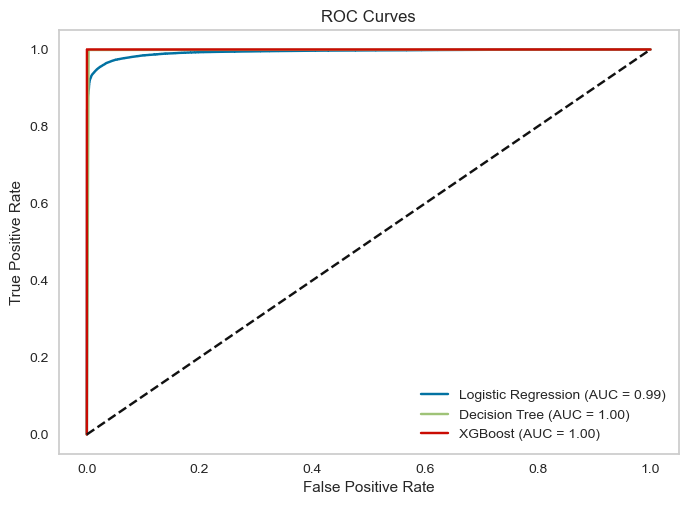

In [57]:
# Get the predicted probabilities for each model
logit_probs = logit_model.predict_proba(X_test)[:, 1]
dt_probs = decision_tree_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_clf.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for each model
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

# Compute the AUC score for each model
logit_auc = roc_auc_score(y_test, logit_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Plot the ROC curves
plt.plot(logit_fpr, logit_tpr, label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Set the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(False)

plt.show()

I wanted to see if we can find any relationship between the features in dataset 1 and the features in dataset 2 to possibly build some interpretability. 
Since there are a lot of assumptions I'd need to make about the first dataset and I don't have graduate level statistics knowledge... this all can be ignored

In [13]:
!kaggle datasets download -d dhanushnarayananr/credit-card-fraud

with zipfile.ZipFile('credit-card-fraud.zip', 'r') as rip_ref:
    rip_ref.extractall('.')
!del -f credit-card-fraud.zip
shutil.move('card_transdata.csv',  '../../data/card_transdata.csv')


  0%|          | 0.00/28.9M [00:00<?, ?B/s]
  3%|▎         | 1.00M/28.9M [00:00<00:03, 9.50MB/s]
 10%|█         | 3.00M/28.9M [00:00<00:02, 12.9MB/s]
 17%|█▋        | 5.00M/28.9M [00:00<00:04, 5.26MB/s]
 21%|██        | 6.00M/28.9M [00:01<00:05, 4.47MB/s]
 24%|██▍       | 7.00M/28.9M [00:01<00:06, 3.73MB/s]
 28%|██▊       | 8.00M/28.9M [00:02<00:06, 3.30MB/s]
 31%|███       | 9.00M/28.9M [00:02<00:06, 3.04MB/s]
 35%|███▍      | 10.0M/28.9M [00:02<00:06, 2.85MB/s]
 38%|███▊      | 11.0M/28.9M [00:03<00:06, 2.76MB/s]
 42%|████▏     | 12.0M/28.9M [00:03<00:06, 2.69MB/s]
 45%|████▌     | 13.0M/28.9M [00:04<00:06, 2.66MB/s]
 48%|████▊     | 14.0M/28.9M [00:04<00:05, 2.61MB/s]
 52%|█████▏    | 15.0M/28.9M [00:04<00:05, 2.59MB/s]
 55%|█████▌    | 16.0M/28.9M [00:05<00:05, 2.57MB/s]
 59%|█████▉    | 17.0M/28.9M [00:05<00:04, 2.58MB/s]
 62%|██████▏   | 18.0M/28.9M [00:06<00:06, 1.68MB/s]
 66%|██████▌   | 19.0M/28.9M [00:08<00:09, 1.13MB/s]
 69%|██████▉   | 20.0M/28.9M [00:10<00:10, 907kB/s] 
 

'../../data/card_transdata.csv'

In [31]:
df2 = pd.read_csv('../../data/card_transdata.csv')

mean_v14_class_0 = df[df['Class'] == 0]['V14'].mean()
mean_v14_class_1 = df[df['Class'] == 1]['V14'].mean()

df2['synthetic_v14'] = df2['fraud'].apply(lambda x: mean_v14_class_1 if x == 1 else mean_v14_class_0)

df2.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,synthetic_v14
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403,0.664833
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425,0.455082
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000,-0.805669
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000,0.805669
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000,0.805669
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000,0.805669
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000,0.805669


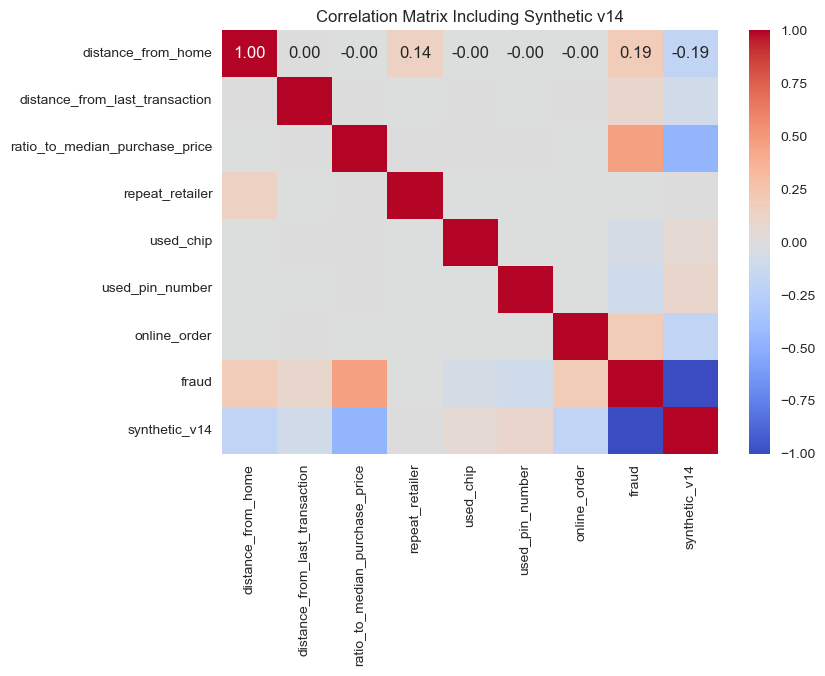

In [30]:
correlation_matrix = df2.corr() 
correlations_with_v14 = correlation_matrix['synthetic_v14'].sort_values(ascending=False)

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Including Synthetic v14')
plt.show()